In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.tsa.api as smt
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
for i in df.columns:
    print(i,': ',df[i].unique())

Car_Name :  ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 

In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
final_dataset = df.drop('Car_Name',axis=1)

In [9]:
final_dataset

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


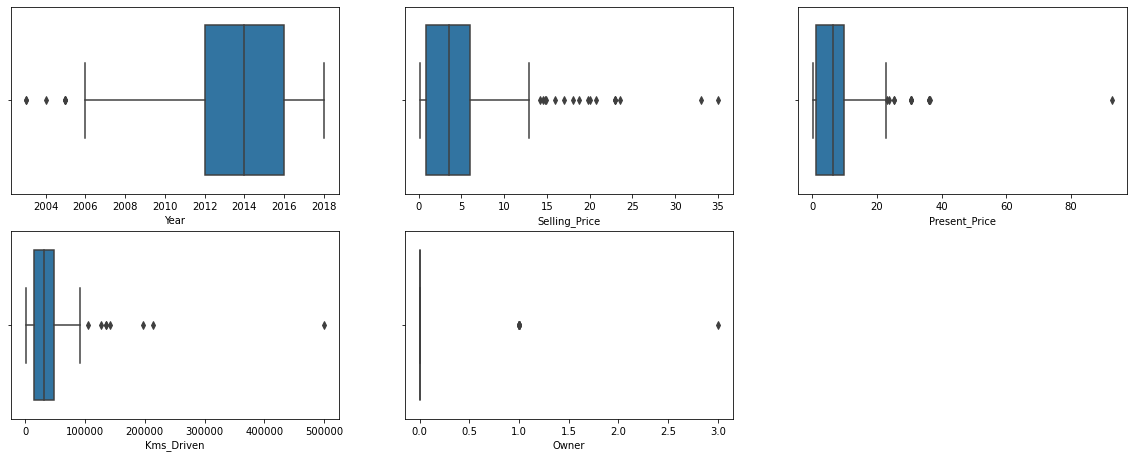

In [10]:
k = 1
plt.figure(figsize =(20,20))
for i in final_dataset.columns:
    if(final_dataset[i].dtypes != 'object'):
        plt.subplot(5,3,k)
        sns.boxplot(x=final_dataset[i])
        k+=1

In [11]:
final_dataset['Current_year'] = 2021

In [12]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [13]:
final_dataset['no_year']= 2021 - final_dataset['Year']

In [14]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [15]:
final_dataset.drop(['Year','Current_year'],axis=1,inplace = True)

In [16]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [17]:
final_dataset = pd.get_dummies(final_dataset,drop_first=True)

In [18]:
final_dataset

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,5,1,0,0,1
297,4.00,5.90,60000,0,6,0,1,0,1
298,3.35,11.00,87934,0,12,0,1,0,1
299,11.50,12.50,9000,0,4,1,0,0,1


In [19]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


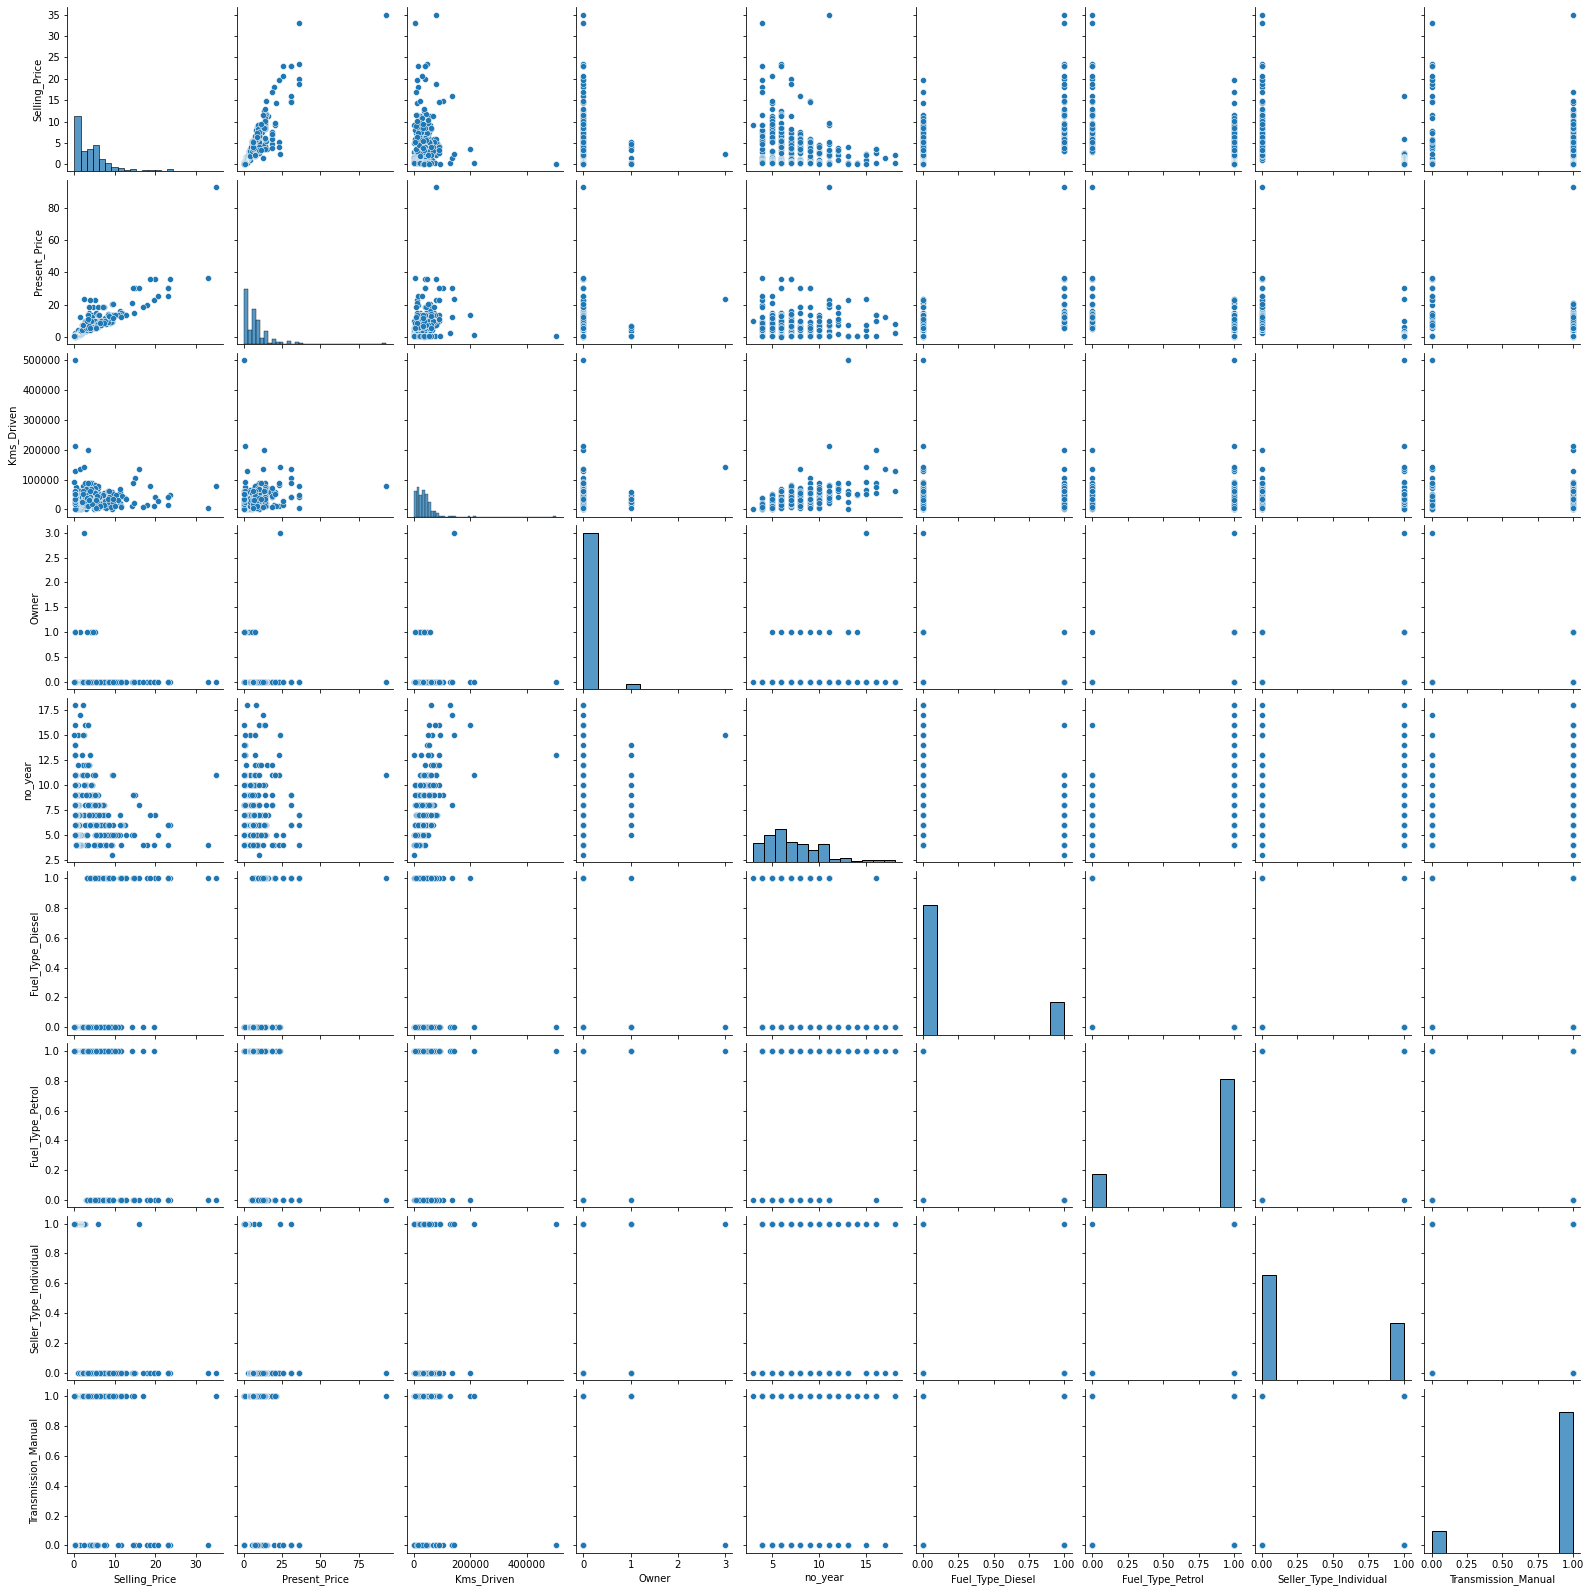

In [20]:
sns.pairplot(final_dataset)

<AxesSubplot:>

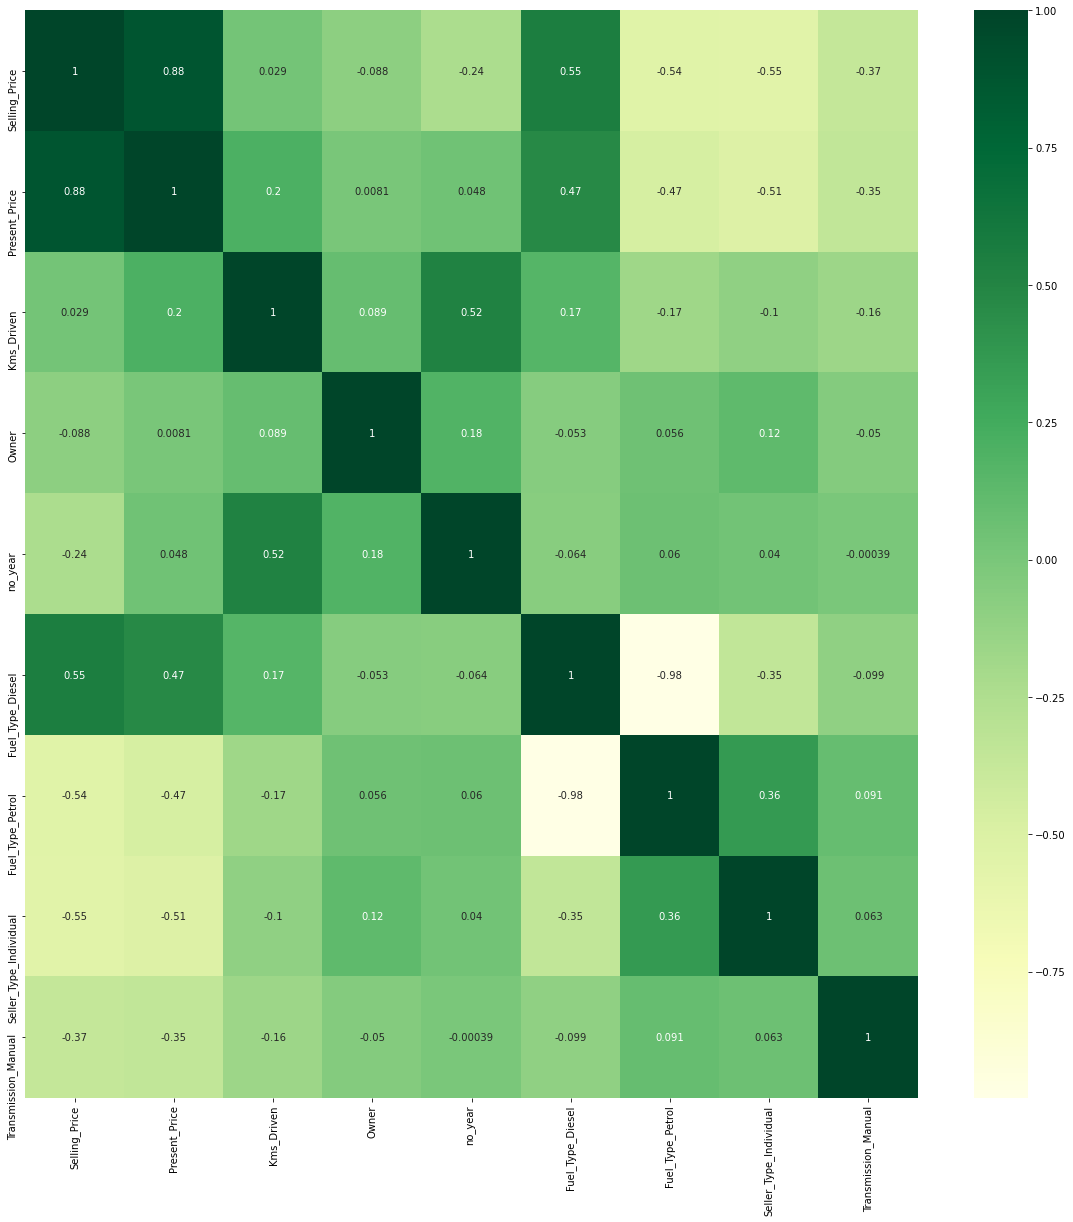

In [21]:
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))
sns.heatmap(final_dataset[top_corr_features].corr(),annot = True, cmap = 'YlGn')

In [22]:
X = final_dataset.drop('Selling_Price', axis = 1)

In [23]:
Y = final_dataset['Selling_Price']
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1, random_state=1)
print(X_train.shape, X_test.shape ,Y_train.shape ,Y_test.shape)

(270, 8) (31, 8) (270,) (31,)


In [25]:
Xc = sm.add_constant(X)
model_v1 = sm.OLS(Y,Xc).fit()
model_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     274.3
Date:                Fri, 19 Nov 2021   Prob (F-statistic):          5.71e-131
Time:                        16:07:49   Log-Likelihood:                -593.62
No. Observations:                 301   AIC:                             1205.
Df Residuals:                     292   BIC:                             1239.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5.1882      1.330      3.901      0.000       2.571       7.805
Present_Price              0.4372      0.016     27.355      0.000       0.406       0.469
Kms_Driven             -7.013e-06   3.23e-06     -2.172      0.031   -1.34e-05   -6.57e-07
Owner                     -0.6742      0.423     -1.595      0.112      -1.506       0.158
no_year                   -0.3931      0.043     -9.159      0.000      -0.478      -0.309
Fuel_Type_Diesel           2.4699      1.278      1.932      0.054      -0.046       4.986
Fuel_Type_Petrol           0.6077      1.259      0.483      0.630      -1.870       3.085
Seller_Type_Individual    -1.1213      0.257     -4.371      0.000      -1.626      -0.616
Transmission_Manual       -1.4482      0.328     -4.417      0.000      -2.093      -0.803
==============================================================================
Omnibus:                       95.107   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              696.392
Skew:                           1.075   Prob(JB):                    6.03e-152
Kurtosis:                      10.135   Cond. No.                     1.15e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
r_sq = model_v1.rsquared
r_sq_adj = model_v1.rsquared_adj
print('r2 :', r_sq)
print('r2_adj', r_sq_adj)

r2 : 0.8825741581640658
r2_adj 0.8793570118123963


In [27]:
#linear regression

In [28]:
linear_regression = LinearRegression()
linear_regression.fit(X_train.values,Y_train.values)
rmse = (mean_squared_error(Y_test,linear_regression.predict(X_test))**0.5)
print(rmse)

1.9542918336044588


In [29]:
predict = linear_regression.predict(X_test)
predict

array([ 7.81571082,  2.97397349, -0.51868592,  4.1824677 ,  0.52531398,
        5.78936015,  1.94468562,  2.59149653,  7.7266758 ,  0.98549534,
        8.10049466,  3.51673114,  4.88719327,  4.60739441, -2.0797094 ,
        3.09417821,  7.95244807,  6.7558933 ,  6.89442966,  7.98707163,
        4.31991767,  4.07318399, 11.38026446,  8.05346588,  9.60944582,
        3.45853307,  3.87217962,  1.07104394, -0.57093739, -0.55817872,
        0.03214186])

In [30]:
r2_score(predict, Y_test)

0.6630942305946796

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

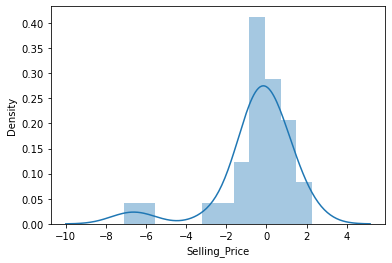

In [31]:
sns.distplot(Y_test-predict)

<AxesSubplot:xlabel='Selling_Price'>

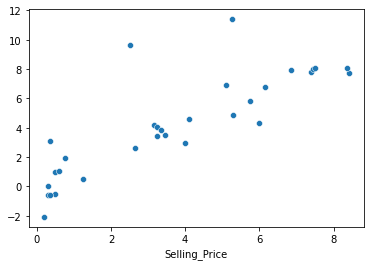

In [32]:
sns.scatterplot(Y_test,predict)

In [33]:
#lasso regression

In [34]:
lasso_regression = Lasso()
lasso_regression.fit(X_train.values,Y_train.values)
rmse_lasso = (mean_squared_error(Y_test,linear_regression.predict(X_test))**0.5)
print(rmse_lasso)

1.9542918336044588


In [35]:
predict_lasso = lasso_regression.predict(X_test)
predict_lasso

array([ 6.01973477,  2.9723604 ,  0.50789049,  3.89350057,  1.4323646 ,
        5.62770993,  2.44642968,  2.86307194,  8.27369172,  1.66514818,
        6.46672315,  3.6396111 ,  4.71225499,  4.38150442, -1.00069572,
        1.82883627,  6.50089861,  5.40059485,  5.44738246,  6.53279201,
        5.27353498,  4.76881992, 11.30140479,  6.46236191, 10.2017763 ,
        3.81930022,  4.76805827,  1.75664207,  0.36581891,  0.49735542,
        0.87193726])

In [36]:
r2_score(predict_lasso, Y_test)

0.5103703083094902

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

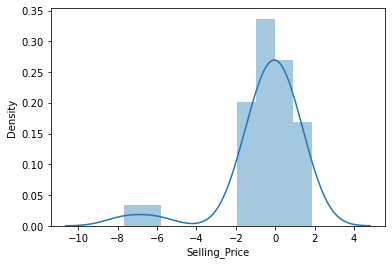

In [37]:
sns.distplot(Y_test-predict_lasso)

<AxesSubplot:xlabel='Selling_Price'>

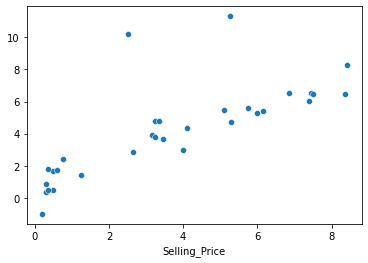

In [38]:
sns.scatterplot(Y_test,predict_lasso)

In [39]:
#ridge regression

In [40]:
ridge_regression = Ridge()
ridge_regression.fit(X_train.values,Y_train.values)
rmse = (mean_squared_error(Y_test,ridge_regression.predict(X_test))**0.5)
print(rmse)

1.9406337807898826


In [41]:
predict_ridge = ridge_regression.predict(X_test)
predict_ridge

array([ 7.74625776,  2.96380358, -0.50974066,  4.177353  ,  0.54282755,
        5.79340896,  1.96953397,  2.58101248,  7.74557092,  1.00799169,
        8.07583766,  3.51312253,  4.88424874,  4.56840621, -2.11314008,
        3.04404065,  7.93291927,  6.72751435,  6.82281961,  7.96653838,
        4.3610873 ,  4.06993164, 11.34239713,  7.98502536,  9.49560077,
        4.36078737,  3.87743792,  1.09275073, -0.55109439, -0.54464167,
        0.04980925])

In [42]:
r2_score(predict_ridge, Y_test)

0.6632942183973527

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

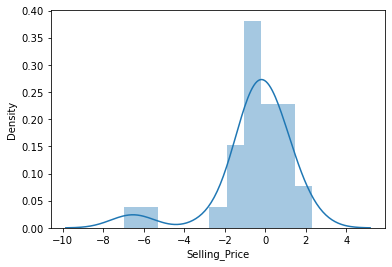

In [43]:
sns.distplot(Y_test-predict_ridge)

<AxesSubplot:xlabel='Selling_Price'>

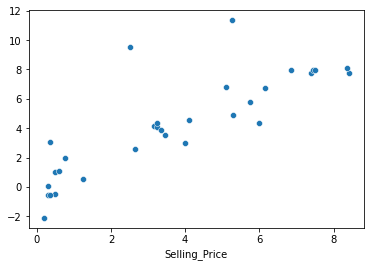

In [44]:
sns.scatterplot(Y_test,predict_ridge)

In [45]:
#elastic regression

In [46]:
ElasticNet = ElasticNet()
ElasticNet.fit(X_train.values,Y_train.values)
rmse = (mean_squared_error(Y_test,linear_regression.predict(X_test))**0.5)
print(rmse)

1.9542918336044588


In [47]:
predict_ElasticNet = ElasticNet.predict(X_test)
predict_ElasticNet

array([ 6.10136306,  2.91958823,  0.30158806,  3.96668673,  1.34606861,
        5.75301891,  2.54281518,  2.7338037 ,  8.34891904,  1.69431498,
        6.55812069,  3.62060692,  4.77117555,  4.40158202, -1.33389398,
        1.91042231,  6.6003299 ,  5.38482804,  5.4156693 ,  6.62135326,
        5.4042745 ,  4.58791379, 11.2230692 ,  6.49567187, 10.03296551,
        3.87981681,  4.62870846,  1.77443943,  0.30786019,  0.33499188,
        0.81093223])

In [48]:
r2_score(predict_ElasticNet, Y_test)

0.5380398088054645

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

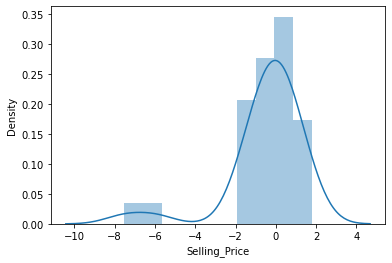

In [49]:
sns.distplot(Y_test-predict_ElasticNet)

<AxesSubplot:xlabel='Selling_Price'>

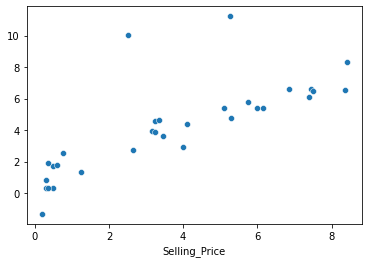

In [50]:
sns.scatterplot(Y_test,predict_ElasticNet)

In [51]:
#random forest regression

In [52]:
rfreg = RandomForestRegressor()
rfreg.fit(X_train.values,Y_train.values)
rmse = (mean_squared_error(Y_test,rfreg.predict(X_test))**0.5)
print(rmse)

1.70055371646433


In [53]:
predict_rfreg = rfreg.predict(X_test)
predict_rfreg

array([ 6.6774,  2.912 ,  0.4667,  2.934 ,  1.0688,  5.296 ,  0.8191,
        3.1955,  8.873 ,  0.5858,  8.4191,  4.008 ,  5.3335,  4.241 ,
        0.1671,  0.4333,  7.2515,  5.4005,  5.011 ,  7.116 ,  5.088 ,
        3.7395,  8.5967,  7.0875, 11.0686,  3.1445,  3.1735,  0.6376,
        0.2154,  0.4598,  0.2426])

In [54]:
predict_rfreg_train = rfreg.predict(X_train)
predict_rfreg_train

array([ 0.1815,  4.6245, 20.7412, 22.7975,  4.4405,  3.5855,  1.0243,
        0.2153,  4.3285, 10.1106, 12.2225,  0.2362,  4.544 ,  4.1735,
        4.0365,  6.7465,  6.535 ,  7.3015,  1.279 ,  3.8635,  0.4702,
        2.2955,  4.078 ,  1.1198,  0.1798, 19.0127,  0.5345,  6.3145,
        5.6705,  0.242 ,  1.596 , 13.9215,  5.08  ,  0.4666,  0.6996,
        2.3436,  0.4002,  4.2863,  0.2388,  9.0188,  7.742 ,  5.9045,
        0.41  ,  1.1925,  2.1605,  1.6741, 10.2051,  8.6685,  4.693 ,
        2.9565,  1.1635,  9.619 , 11.4367,  1.1792,  5.593 ,  2.669 ,
        0.6253,  0.7219,  7.3405,  5.186 ,  6.171 ,  2.915 ,  2.3805,
        9.9668, 11.7355,  0.4695,  1.501 ,  0.463 ,  0.5525,  0.9562,
        9.7298,  2.69  , 15.0004,  3.9125,  0.2955,  1.0181,  1.1576,
        1.0605,  9.793 ,  4.116 ,  8.0995,  5.2315,  0.2559,  4.318 ,
        2.5335,  0.417 ,  3.8672,  2.2   ,  5.1845,  0.4129,  5.809 ,
        6.105 ,  0.488 ,  5.168 ,  6.2055, 22.7975,  0.3914,  3.336 ,
        4.802 , 23.0

In [55]:
r2_score(predict_rfreg, Y_test)

0.6865720096957568

In [56]:
r2_score(predict_rfreg_train, Y_train)

0.9830964518519938

In [57]:
from sklearn.model_selection import GridSearchCV
rfreg = RandomForestRegressor()
rfreg.fit(X_train.values,Y_train.values)
params = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
rf = GridSearchCV(estimator=rfreg,param_grid=params,cv=5,scoring='recall')
rf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400,
                                          1600, 1800, 2000]},
             scoring='recall')

In [58]:
best = rf.best_estimator_
best

RandomForestRegressor(max_depth=10, n_estimators=200)

In [59]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    rmse = (mean_squared_error(test_labels,model.predict(test_features))**0.5)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('rmse = {}'.format(rmse))
    
    return accuracy

In [60]:
grid_accuracy = evaluate(best, X_test, Y_test)

Model Performance
Average Error: 0.7057 degrees.
Accuracy = 74.33%.
rmse = 1.8762617735366838


In [61]:
predict_rfreg = best.predict(X_test)
predict_rfreg

array([ 6.62272252,  2.8832125 ,  0.48417207,  2.9334625 ,  1.07343817,
        5.33340417,  0.80979187,  3.23117917,  8.73191093,  0.57983611,
        8.32659089,  3.94471101,  5.38106747,  4.30300967,  0.16507158,
        0.43741668,  7.30850766,  5.39896138,  5.0178188 ,  7.24043623,
        5.05422202,  3.6806125 ,  8.959825  ,  7.10759079, 12.0045    ,
        3.13124583,  3.093625  ,  0.62335316,  0.20017127,  0.45760288,
        0.23997408])

In [62]:
predict_rfreg_train = best.predict(X_train)
predict_rfreg_train

array([ 0.17981152,  4.73351857, 20.85265   , 22.7986    ,  4.32539062,
        3.51745818,  1.00796268,  0.21190781,  4.30606443, 10.09213134,
       12.12645461,  0.22827438,  4.47745135,  4.21511868,  4.13483533,
        6.79013117,  6.52137333,  7.36517952,  1.26539109,  3.81705325,
        0.46970914,  2.32077917,  4.11613929,  1.13342617,  0.16919335,
       19.0278    ,  0.53624982,  6.24839221,  5.78546667,  0.24604444,
        1.58891667, 13.87992917,  5.08490057,  0.46335345,  0.68139887,
        2.2655    ,  0.39665532,  4.40605   ,  0.23542138,  9.05182609,
        7.83882827,  6.1324875 ,  0.40770716,  1.18134462,  2.09267857,
        1.70777083, 10.32087717,  8.67627738,  4.68363615,  2.96264583,
        1.16181379,  9.8679    , 11.19042917,  1.1663957 ,  5.59383065,
        2.69837917,  0.62349438,  0.71771145,  7.36739722,  5.24770822,
        6.26369623,  2.76574231,  2.334625  , 10.08705   , 11.68400833,
        0.49632207,  1.47909167,  0.48436362,  0.55612251,  0.93

In [63]:
r2_score(predict_rfreg, Y_test)

0.6398444339469767

In [64]:
r2_score(predict_rfreg_train, Y_train)

0.9844543168452567

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

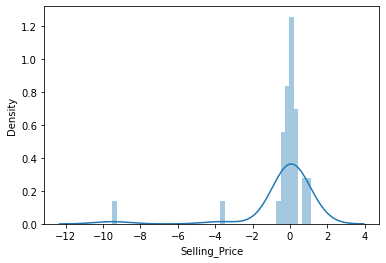

In [65]:
sns.distplot(Y_test-predict_rfreg)

<AxesSubplot:xlabel='Selling_Price'>

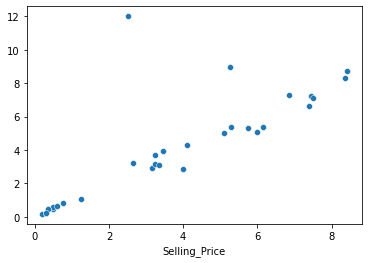

In [66]:
sns.scatterplot(Y_test,predict_rfreg)

In [51]:
#random forest regression

In [67]:
knnreg = KNeighborsRegressor(n_neighbors = 200)
knnreg.fit(X_train.values,Y_train.values)
rmse = (mean_squared_error(Y_test,knnreg.predict(X_test))**0.5)
print(rmse)

2.9276432294925465


In [68]:
predict_knnreg = knnreg.predict(X_test)
predict_knnreg

array([4.6874 , 4.788  , 4.6874 , 4.6874 , 4.6874 , 4.6874 , 4.6874 ,
       4.78595, 4.8601 , 4.6874 , 4.6874 , 4.9228 , 4.6874 , 4.812  ,
       4.9448 , 4.6874 , 4.96455, 4.7258 , 4.8572 , 4.7258 , 4.6874 ,
       4.77325, 5.18865, 4.6874 , 5.08015, 4.8217 , 5.0764 , 4.6874 ,
       5.10755, 4.788  , 4.788  ])

In [69]:
predict_knnreg_train = knnreg.predict(X_train)
predict_knnreg_train

array([4.8006 , 4.8213 , 4.8162 , 4.8175 , 4.8175 , 4.87885, 4.6874 ,
       4.73455, 4.70935, 4.9448 , 4.8572 , 4.6874 , 4.78595, 4.9943 ,
       4.8006 , 4.9448 , 4.8572 , 4.7372 , 4.6874 , 4.80305, 4.6874 ,
       4.6874 , 5.10755, 4.6874 , 5.0353 , 5.18865, 4.6874 , 4.7258 ,
       4.77565, 4.6874 , 4.6874 , 4.6874 , 4.9943 , 4.80305, 4.6874 ,
       5.10755, 4.6874 , 5.10755, 4.70935, 4.6874 , 4.78595, 5.1069 ,
       4.6874 , 4.6874 , 5.0353 , 4.6874 , 4.6874 , 4.6874 , 4.6874 ,
       4.6874 , 4.6874 , 5.0353 , 4.6874 , 4.6874 , 4.7258 , 4.6874 ,
       4.6874 , 4.6874 , 4.6874 , 4.6874 , 4.6874 , 4.7372 , 4.9894 ,
       5.0353 , 4.7878 , 4.6874 , 4.9448 , 4.78595, 5.0353 , 4.6874 ,
       4.79615, 4.9228 , 5.18865, 4.6874 , 4.6874 , 4.9228 , 4.6874 ,
       4.6874 , 4.9448 , 4.8175 , 4.6874 , 5.0353 , 4.80555, 4.8601 ,
       5.0353 , 4.6874 , 5.10755, 4.71865, 4.76035, 4.6874 , 4.8058 ,
       4.6874 , 4.6874 , 4.6874 , 4.7258 , 4.8175 , 4.6874 , 4.9448 ,
       4.87885, 4.92

In [70]:
r2_score(predict_knnreg, Y_test)

-409.2755529250574

In [71]:
r2_score(predict_knnreg_train, Y_train)

-1204.1364095200158

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

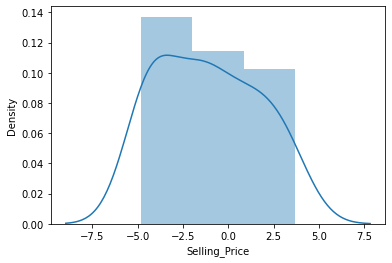

In [72]:
sns.distplot(Y_test-predict_knnreg)

<AxesSubplot:xlabel='Selling_Price'>

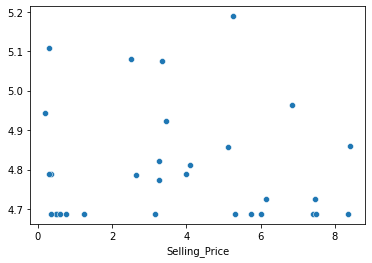

In [73]:
sns.scatterplot(Y_test,predict_knnreg)

In [74]:
import pickle
file = open('random_forest_regression_model.pkl','wb')
pickle.dump(rfreg,file)